In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Model,layers

In [2]:
import tensorflow as tf

In [4]:
IMAGE_SIZE=256

In [18]:
import splitfolders
splitfolders.ratio('C:\Users\Mohammad Siddavatam\Downloads\Plant_leave_diseases_dataset_without_augmentation', output="AppleDataSet", seed=1337, ratio=(.8, 0.1,0.1))

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (2850455311.py, line 2)

In [2]:
import splitfolders
splitfolders.ratio(r'C:\Users\Mohammad Siddavatam\Downloads\Plant_leave_diseases_dataset_without_augmentation', output="DataSet", seed=1337, ratio=(.8, 0.1,0.1))

Copying files: 55448 files [01:56, 475.54 files/s]


In [4]:
IMAGE_SIZE=256
train_data=ImageDataGenerator(
rescale=1./255,
shear_range=0.2,
zoom_range=0.2,
width_shift_range=0.2,
height_shift_range=0.2,
horizontal_flip=True,
fill_mode='nearest'
)
train_generator=train_data.flow_from_directory(
'Data/train',
target_size=(IMAGE_SIZE,IMAGE_SIZE),
batch_size=256,
class_mode='sparse'
)

FileNotFoundError: [Errno 2] No such file or directory: 'DataSet/train'

In [4]:
class_names = list(train_generator.class_indices.keys())

In [7]:
class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Background_without_leaves',
 'Blueberry___healthy',
 'Cherry___Powdery_mildew',
 'Cherry___healthy',
 'Corn___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn___Common_rust',
 'Corn___Northern_Leaf_Blight',
 'Corn___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot'

In [6]:
valid_data=ImageDataGenerator(
rescale=1./255,
rotation_range=10,
horizontal_flip=True
)
valid_generator=valid_data.flow_from_directory(
'/Users/fasihussaini/Desktop/PlantVillage/val',
target_size=(IMAGE_SIZE,IMAGE_SIZE),
batch_size=256,
class_mode='sparse'
)

Found 5531 images belonging to 39 classes.


In [5]:
test_data=ImageDataGenerator(
rescale=1./255,
rotation_range=10,
horizontal_flip=True
)
test_generator=test_data.flow_from_directory(
'/Users/fasihussaini/Desktop/PlantVillage/test',
target_size=(IMAGE_SIZE,IMAGE_SIZE),
batch_size=256,
class_mode='sparse'
)

Found 5574 images belonging to 39 classes.


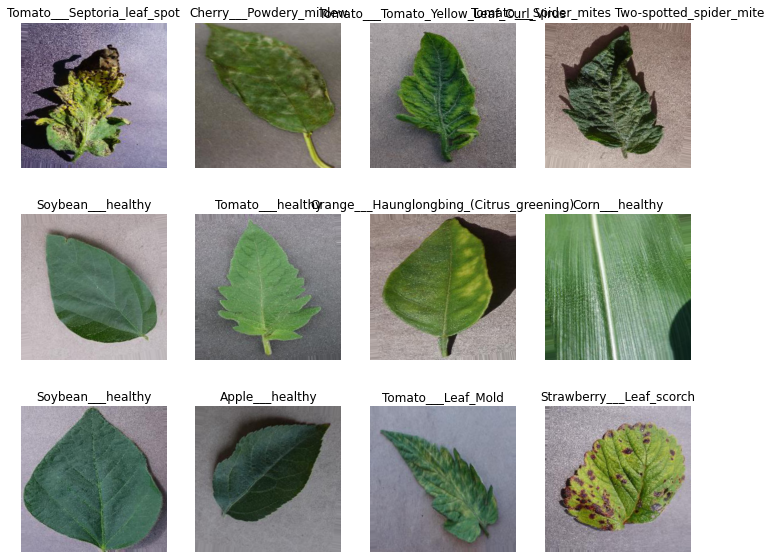

In [10]:
for image_batch, label_batch in test_generator:
    plt.figure(figsize=(12,10))
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i])
        plt.title(class_names[int(label_batch[i])])
        plt.axis('off')
    break

In [7]:
from tensorflow.keras.applications import densenet
base_model=densenet.DenseNet201(

input_shape=(IMAGE_SIZE,IMAGE_SIZE,3),

include_top=False,

pooling='max')

base_model.trainable=False

74850304/74836368 [==============================] - 4s 0us/step


In [8]:
base_model.summary()

Model: "densenet201"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 262, 262, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 128, 128, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                        

 n)                                                                                               
                                                                                                  
 conv2_block4_1_conv (Conv2D)   (None, 64, 64, 128)  20480       ['conv2_block4_0_relu[0][0]']    
                                                                                                  
 conv2_block4_1_bn (BatchNormal  (None, 64, 64, 128)  512        ['conv2_block4_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block4_1_relu (Activatio  (None, 64, 64, 128)  0          ['conv2_block4_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_blo

 conv3_block2_0_relu (Activatio  (None, 32, 32, 160)  0          ['conv3_block2_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block2_1_conv (Conv2D)   (None, 32, 32, 128)  20480       ['conv3_block2_0_relu[0][0]']    
                                                                                                  
 conv3_block2_1_bn (BatchNormal  (None, 32, 32, 128)  512        ['conv3_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block2_1_relu (Activatio  (None, 32, 32, 128)  0          ['conv3_block2_1_bn[0][0]']      
 n)                                                                                               
          

                                                                                                  
 conv3_block6_1_relu (Activatio  (None, 32, 32, 128)  0          ['conv3_block6_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block6_2_conv (Conv2D)   (None, 32, 32, 32)   36864       ['conv3_block6_1_relu[0][0]']    
                                                                                                  
 conv3_block6_concat (Concatena  (None, 32, 32, 320)  0          ['conv3_block5_concat[0][0]',    
 te)                                                              'conv3_block6_2_conv[0][0]']    
                                                                                                  
 conv3_block7_0_bn (BatchNormal  (None, 32, 32, 320)  1280       ['conv3_block6_concat[0][0]']    
 ization) 

 ate)                                                             'conv3_block10_2_conv[0][0]']   
                                                                                                  
 conv3_block11_0_bn (BatchNorma  (None, 32, 32, 448)  1792       ['conv3_block10_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv3_block11_0_relu (Activati  (None, 32, 32, 448)  0          ['conv3_block11_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv3_block11_1_conv (Conv2D)  (None, 32, 32, 128)  57344       ['conv3_block11_0_relu[0][0]']   
                                                                                                  
 conv3_blo

 conv4_block2_concat (Concatena  (None, 16, 16, 320)  0          ['conv4_block1_concat[0][0]',    
 te)                                                              'conv4_block2_2_conv[0][0]']    
                                                                                                  
 conv4_block3_0_bn (BatchNormal  (None, 16, 16, 320)  1280       ['conv4_block2_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block3_0_relu (Activatio  (None, 16, 16, 320)  0          ['conv4_block3_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block3_1_conv (Conv2D)   (None, 16, 16, 128)  40960       ['conv4_block3_0_relu[0][0]']    
          

 n)                                                                                               
                                                                                                  
 conv4_block7_1_conv (Conv2D)   (None, 16, 16, 128)  57344       ['conv4_block7_0_relu[0][0]']    
                                                                                                  
 conv4_block7_1_bn (BatchNormal  (None, 16, 16, 128)  512        ['conv4_block7_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block7_1_relu (Activatio  (None, 16, 16, 128)  0          ['conv4_block7_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_blo

 conv4_block11_1_relu (Activati  (None, 16, 16, 128)  0          ['conv4_block11_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block11_2_conv (Conv2D)  (None, 16, 16, 32)   36864       ['conv4_block11_1_relu[0][0]']   
                                                                                                  
 conv4_block11_concat (Concaten  (None, 16, 16, 608)  0          ['conv4_block10_concat[0][0]',   
 ate)                                                             'conv4_block11_2_conv[0][0]']   
                                                                                                  
 conv4_block12_0_bn (BatchNorma  (None, 16, 16, 608)  2432       ['conv4_block11_concat[0][0]']   
 lization)                                                                                        
          

                                                                                                  
 conv4_block16_0_bn (BatchNorma  (None, 16, 16, 736)  2944       ['conv4_block15_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block16_0_relu (Activati  (None, 16, 16, 736)  0          ['conv4_block16_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block16_1_conv (Conv2D)  (None, 16, 16, 128)  94208       ['conv4_block16_0_relu[0][0]']   
                                                                                                  
 conv4_block16_1_bn (BatchNorma  (None, 16, 16, 128)  512        ['conv4_block16_1_conv[0][0]']   
 lization)

 conv4_block20_1_conv (Conv2D)  (None, 16, 16, 128)  110592      ['conv4_block20_0_relu[0][0]']   
                                                                                                  
 conv4_block20_1_bn (BatchNorma  (None, 16, 16, 128)  512        ['conv4_block20_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block20_1_relu (Activati  (None, 16, 16, 128)  0          ['conv4_block20_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block20_2_conv (Conv2D)  (None, 16, 16, 32)   36864       ['conv4_block20_1_relu[0][0]']   
                                                                                                  
 conv4_blo

                                                                                                  
 conv4_block24_2_conv (Conv2D)  (None, 16, 16, 32)   36864       ['conv4_block24_1_relu[0][0]']   
                                                                                                  
 conv4_block24_concat (Concaten  (None, 16, 16, 1024  0          ['conv4_block23_concat[0][0]',   
 ate)                           )                                 'conv4_block24_2_conv[0][0]']   
                                                                                                  
 conv4_block25_0_bn (BatchNorma  (None, 16, 16, 1024  4096       ['conv4_block24_concat[0][0]']   
 lization)                      )                                                                 
                                                                                                  
 conv4_block25_0_relu (Activati  (None, 16, 16, 1024  0          ['conv4_block25_0_bn[0][0]']     
 on)      

 lization)                      )                                                                 
                                                                                                  
 conv4_block29_0_relu (Activati  (None, 16, 16, 1152  0          ['conv4_block29_0_bn[0][0]']     
 on)                            )                                                                 
                                                                                                  
 conv4_block29_1_conv (Conv2D)  (None, 16, 16, 128)  147456      ['conv4_block29_0_relu[0][0]']   
                                                                                                  
 conv4_block29_1_bn (BatchNorma  (None, 16, 16, 128)  512        ['conv4_block29_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_blo

 conv4_block33_1_bn (BatchNorma  (None, 16, 16, 128)  512        ['conv4_block33_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block33_1_relu (Activati  (None, 16, 16, 128)  0          ['conv4_block33_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block33_2_conv (Conv2D)  (None, 16, 16, 32)   36864       ['conv4_block33_1_relu[0][0]']   
                                                                                                  
 conv4_block33_concat (Concaten  (None, 16, 16, 1312  0          ['conv4_block32_concat[0][0]',   
 ate)                           )                                 'conv4_block33_2_conv[0][0]']   
          

                                                                                                  
 conv4_block37_concat (Concaten  (None, 16, 16, 1440  0          ['conv4_block36_concat[0][0]',   
 ate)                           )                                 'conv4_block37_2_conv[0][0]']   
                                                                                                  
 conv4_block38_0_bn (BatchNorma  (None, 16, 16, 1440  5760       ['conv4_block37_concat[0][0]']   
 lization)                      )                                                                 
                                                                                                  
 conv4_block38_0_relu (Activati  (None, 16, 16, 1440  0          ['conv4_block38_0_bn[0][0]']     
 on)                            )                                                                 
                                                                                                  
 conv4_blo

 conv4_block42_0_relu (Activati  (None, 16, 16, 1568  0          ['conv4_block42_0_bn[0][0]']     
 on)                            )                                                                 
                                                                                                  
 conv4_block42_1_conv (Conv2D)  (None, 16, 16, 128)  200704      ['conv4_block42_0_relu[0][0]']   
                                                                                                  
 conv4_block42_1_bn (BatchNorma  (None, 16, 16, 128)  512        ['conv4_block42_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block42_1_relu (Activati  (None, 16, 16, 128)  0          ['conv4_block42_1_bn[0][0]']     
 on)                                                                                              
          

                                                                                                  
 conv4_block46_1_relu (Activati  (None, 16, 16, 128)  0          ['conv4_block46_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block46_2_conv (Conv2D)  (None, 16, 16, 32)   36864       ['conv4_block46_1_relu[0][0]']   
                                                                                                  
 conv4_block46_concat (Concaten  (None, 16, 16, 1728  0          ['conv4_block45_concat[0][0]',   
 ate)                           )                                 'conv4_block46_2_conv[0][0]']   
                                                                                                  
 conv4_block47_0_bn (BatchNorma  (None, 16, 16, 1728  6912       ['conv4_block46_concat[0][0]']   
 lization)

                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 8, 8, 128)   512         ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 8, 8, 128)   0           ['conv5_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block2_2_conv (Conv2D)   (None, 8, 8, 32)     36864       ['conv5_block2_1_relu[0][0]']    
                                                                                                  
 conv5_block2_concat (Concatena  (None, 8, 8, 960)   0           ['conv5_block1_concat[0][0]',    
 te)      

 conv5_block6_2_conv (Conv2D)   (None, 8, 8, 32)     36864       ['conv5_block6_1_relu[0][0]']    
                                                                                                  
 conv5_block6_concat (Concatena  (None, 8, 8, 1088)  0           ['conv5_block5_concat[0][0]',    
 te)                                                              'conv5_block6_2_conv[0][0]']    
                                                                                                  
 conv5_block7_0_bn (BatchNormal  (None, 8, 8, 1088)  4352        ['conv5_block6_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block7_0_relu (Activatio  (None, 8, 8, 1088)  0           ['conv5_block7_0_bn[0][0]']      
 n)                                                                                               
          

                                                                                                  
 conv5_block11_0_relu (Activati  (None, 8, 8, 1216)  0           ['conv5_block11_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_block11_1_conv (Conv2D)  (None, 8, 8, 128)    155648      ['conv5_block11_0_relu[0][0]']   
                                                                                                  
 conv5_block11_1_bn (BatchNorma  (None, 8, 8, 128)   512         ['conv5_block11_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_block11_1_relu (Activati  (None, 8, 8, 128)   0           ['conv5_block11_1_bn[0][0]']     
 on)      

 lization)                                                                                        
                                                                                                  
 conv5_block15_1_relu (Activati  (None, 8, 8, 128)   0           ['conv5_block15_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_block15_2_conv (Conv2D)  (None, 8, 8, 32)     36864       ['conv5_block15_1_relu[0][0]']   
                                                                                                  
 conv5_block15_concat (Concaten  (None, 8, 8, 1376)  0           ['conv5_block14_concat[0][0]',   
 ate)                                                             'conv5_block15_2_conv[0][0]']   
                                                                                                  
 conv5_blo

 conv5_block19_concat (Concaten  (None, 8, 8, 1504)  0           ['conv5_block18_concat[0][0]',   
 ate)                                                             'conv5_block19_2_conv[0][0]']   
                                                                                                  
 conv5_block20_0_bn (BatchNorma  (None, 8, 8, 1504)  6016        ['conv5_block19_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_block20_0_relu (Activati  (None, 8, 8, 1504)  0           ['conv5_block20_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_block20_1_conv (Conv2D)  (None, 8, 8, 128)    192512      ['conv5_block20_0_relu[0][0]']   
          

 on)                                                                                              
                                                                                                  
 conv5_block24_1_conv (Conv2D)  (None, 8, 8, 128)    208896      ['conv5_block24_0_relu[0][0]']   
                                                                                                  
 conv5_block24_1_bn (BatchNorma  (None, 8, 8, 128)   512         ['conv5_block24_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_block24_1_relu (Activati  (None, 8, 8, 128)   0           ['conv5_block24_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_blo

 conv5_block28_1_relu (Activati  (None, 8, 8, 128)   0           ['conv5_block28_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_block28_2_conv (Conv2D)  (None, 8, 8, 32)     36864       ['conv5_block28_1_relu[0][0]']   
                                                                                                  
 conv5_block28_concat (Concaten  (None, 8, 8, 1792)  0           ['conv5_block27_concat[0][0]',   
 ate)                                                             'conv5_block28_2_conv[0][0]']   
                                                                                                  
 conv5_block29_0_bn (BatchNorma  (None, 8, 8, 1792)  7168        ['conv5_block28_concat[0][0]']   
 lization)                                                                                        
          

                                                                                                  
 bn (BatchNormalization)        (None, 8, 8, 1920)   7680        ['conv5_block32_concat[0][0]']   
                                                                                                  
 relu (Activation)              (None, 8, 8, 1920)   0           ['bn[0][0]']                     
                                                                                                  
 max_pool (GlobalMaxPooling2D)  (None, 1920)         0           ['relu[0][0]']                   
                                                                                                  
Total params: 18,321,984
Trainable params: 0
Non-trainable params: 18,321,984
__________________________________________________________________________________________________


In [9]:
classifier=tf.keras.models.Sequential()
classifier.add(base_model)
classifier.add(layers.Flatten())
classifier.add(layers.Dense(39,activation='softmax'))
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 1920)              18321984  
                                                                 
 flatten (Flatten)           (None, 1920)              0         
                                                                 
 dense (Dense)               (None, 39)                74919     
                                                                 
Total params: 18,396,903
Trainable params: 74,919
Non-trainable params: 18,321,984
_________________________________________________________________


In [10]:
classifier.compile(optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
metrics=['accuracy'])

In [11]:
training_num=train_generator.samples
validation_num=valid_generator.samples
batch_size=256

In [16]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
patience=4
)

In [12]:
history=classifier.fit(train_generator,
                        steps_per_epoch=training_num//batch_size,
                        validation_data=valid_generator,
                        validation_steps=validation_num//batch_size,
                        epochs=50,
                        verbose=1)

Epoch 1/50
173/173 [==============================] - 3357s 19s/step - loss: 1.2066 - accuracy: 0.6947 - val_loss: 0.4036 - val_accuracy: 0.8795
Epoch 2/50
173/173 [==============================] - 3248s 19s/step - loss: 0.3442 - accuracy: 0.8952 - val_loss: 0.2440 - val_accuracy: 0.9284
Epoch 3/50
173/173 [==============================] - 3279s 19s/step - loss: 0.2500 - accuracy: 0.9235 - val_loss: 0.2340 - val_accuracy: 0.9219
Epoch 4/50
173/173 [==============================] - 3257s 19s/step - loss: 0.1999 - accuracy: 0.9386 - val_loss: 0.1887 - val_accuracy: 0.9435
Epoch 5/50
173/173 [==============================] - 3160s 18s/step - loss: 0.1760 - accuracy: 0.9439 - val_loss: 0.1686 - val_accuracy: 0.9477
Epoch 6/50
173/173 [==============================] - 3066s 18s/step - loss: 0.1589 - accuracy: 0.9492 - val_loss: 0.1485 - val_accuracy: 0.9539
Epoch 7/50
173/173 [==============================] - 3051s 18s/step - loss: 0.1449 - accuracy: 0.9543 - val_loss: 0.1408 - val_ac

KeyboardInterrupt: 

In [ ]:
history.history

In [ ]:
2+2

In [2]:
2+2

4

In [18]:
classifier.save('Mobile_net.h5')

In [13]:
classifier.save('dense_net.h5')

In [16]:
classifier.save('dense_net')

INFO:tensorflow:Assets written to: dense_net\assets


In [17]:
classifier.history()

TypeError: 'History' object is not callable

In [18]:
history.history()

NameError: name 'history' is not defined

In [19]:
classifier.history

In [20]:
classifier.history.history

{'loss': [1.206566572189331,
  0.3442313075065613,
  0.2500360310077667,
  0.1998741328716278,
  0.1759885996580124,
  0.1588708758354187,
  0.14487573504447937,
  0.13461026549339294,
  0.1282745599746704,
  0.1264791041612625,
  0.11474429816007614,
  0.11183653026819229,
  0.10835536569356918,
  0.10032179951667786,
  0.1049506664276123,
  0.10070019960403442,
  0.09818019717931747,
  0.09917643666267395,
  0.09806567430496216,
  0.09561124444007874,
  0.09054942429065704,
  0.08992370218038559],
 'accuracy': [0.6946718692779541,
  0.8951618671417236,
  0.9235148429870605,
  0.9386440515518188,
  0.9438836574554443,
  0.9491686820983887,
  0.9542722105979919,
  0.9568353295326233,
  0.9588994383811951,
  0.9583097100257874,
  0.962483286857605,
  0.9625966548919678,
  0.9652278423309326,
  0.9664300084114075,
  0.9647741913795471,
  0.9668155908584595,
  0.9675414562225342,
  0.9666341543197632,
  0.9662712216377258,
  0.9665660858154297,
  0.9689250588417053,
  0.9694240689277649],

In [21]:
clasifier.evaluate()

NameError: name 'clasifier' is not defined

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

NameError: name 'history' is not defined

In [25]:
acc = classifier.history.history['accuracy']
val_acc = classifier.history.history['val_accuracy']
loss = classifier.history.history['loss']
val_loss = classifier.history.history['val_loss']

KeyError: 'accuracy'

In [26]:
classifier.history.history

{}

In [27]:
classifier.history.history

{}

In [28]:
classifier.history.history()

TypeError: 'dict' object is not callable

In [29]:
classifier.history.history={'loss': [1.206566572189331,
  0.3442313075065613,
  0.2500360310077667,
  0.1998741328716278,
  0.1759885996580124,
  0.1588708758354187,
  0.14487573504447937,
  0.13461026549339294,
  0.1282745599746704,
  0.1264791041612625,
  0.11474429816007614,
  0.11183653026819229,
  0.10835536569356918,
  0.10032179951667786,
  0.1049506664276123,
  0.10070019960403442,
  0.09818019717931747,
  0.09917643666267395,
  0.09806567430496216,
  0.09561124444007874,
  0.09054942429065704,
  0.08992370218038559],
 'accuracy': [0.6946718692779541,
  0.8951618671417236,
  0.9235148429870605,
  0.9386440515518188,
  0.9438836574554443,
  0.9491686820983887,
  0.9542722105979919,
  0.9568353295326233,
  0.9588994383811951,
  0.9583097100257874,
  0.962483286857605,
  0.9625966548919678,
  0.9652278423309326,
  0.9664300084114075,
  0.9647741913795471,
  0.9668155908584595,
  0.9675414562225342,
  0.9666341543197632,
  0.9662712216377258,
  0.9665660858154297,
  0.9689250588417053,
  0.9694240689277649],
 'val_loss': [0.40357843041419983,
  0.24400226771831512,
  0.23402313888072968,
  0.1886862963438034,
  0.16861267387866974,
  0.14848603308200836,
  0.1407841444015503,
  0.1557970643043518,
  0.11804506927728653,
  0.1338181495666504,
  0.1286882758140564,
  0.1302136331796646,
  0.11644068360328674,
  0.11682455986738205,
  0.13787296414375305,
  0.1161329373717308,
  0.11523060500621796,
  0.11836975067853928,
  0.10948491096496582,
  0.1232910305261612,
  0.12267693877220154,
  0.11085546761751175],
 'val_accuracy': [0.8794642686843872,
  0.9283854365348816,
  0.921875,
  0.9434523582458496,
  0.9477306604385376,
  0.9538690447807312,
  0.9555431604385376,
  0.9520089030265808,
  0.9620535969734192,
  0.9587053656578064,
  0.9601934552192688,
  0.961123526096344,
  0.9618675708770752,
  0.9637276530265808,
  0.957217276096344,
  0.9624255895614624,
  0.965029776096344,
  0.9627976417541504,
  0.9627976417541504,
  0.9616815447807312,
  0.9587053656578064,
  0.9642857313156128]}

In [30]:
acc = classifier.history.history['accuracy']
val_acc = classifier.history.history['val_accuracy']
loss = classifier.history.history['loss']
val_loss = classifier.history.history['val_loss']

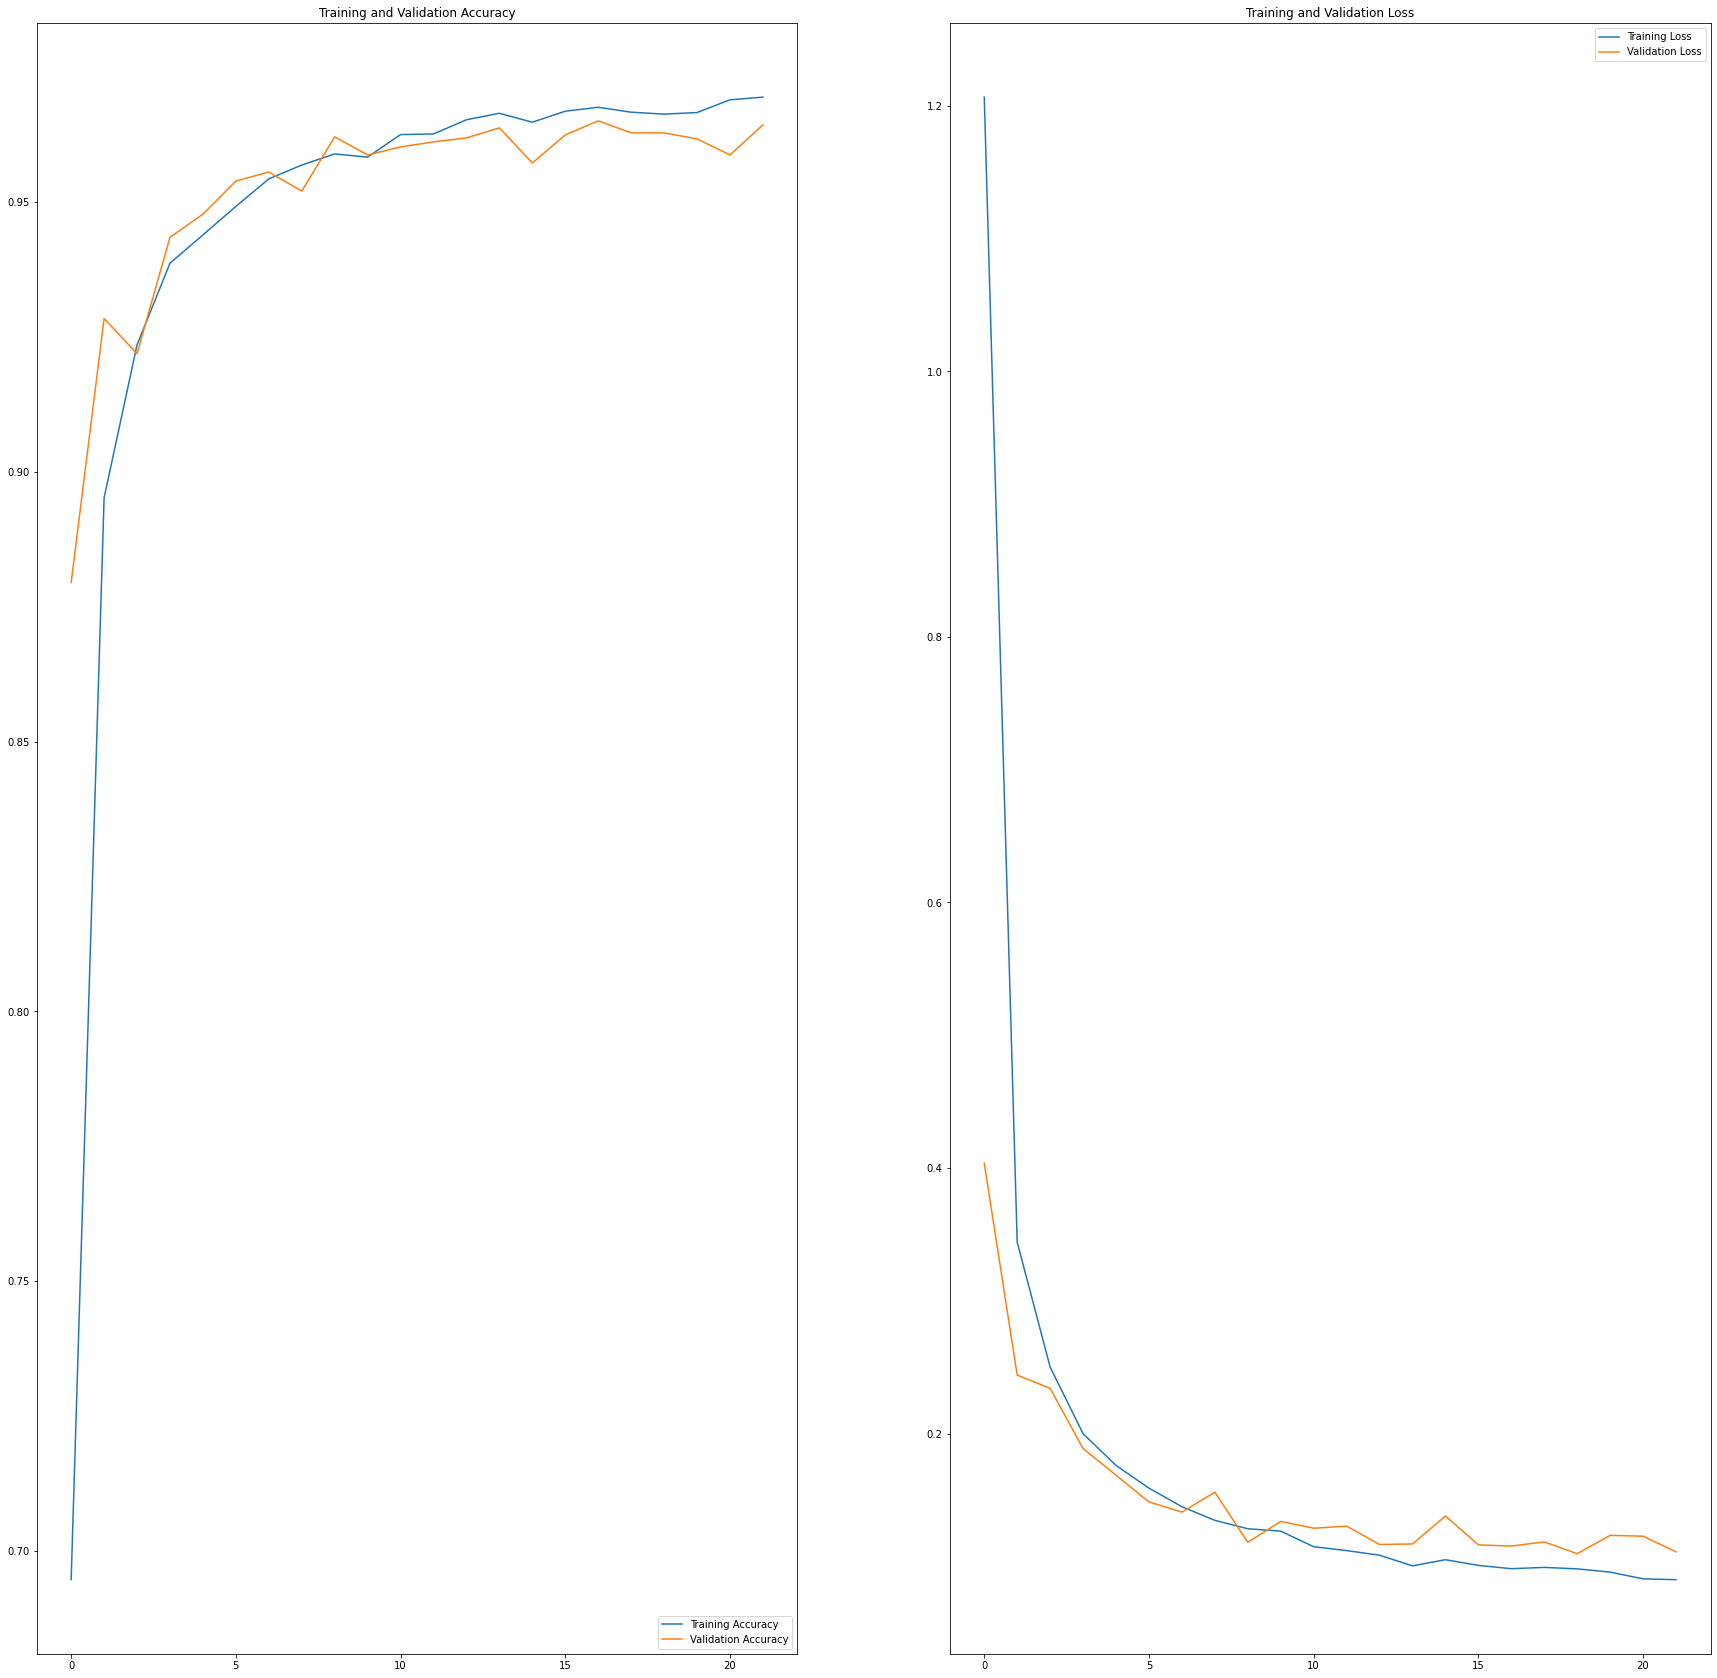

In [31]:
EPOCHS = 22
plt.figure(figsize=(30, 30))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [7]:
new_model = tf.keras.models.load_model('dense_net.h5')

In [8]:
new_model.evaluate(test_generator)


22/22 [==============================] - 958s 44s/step - loss: 0.0982 - accuracy: 0.9657


[0.09817961603403091, 0.9657337665557861]

In [10]:
scores = [0.09607630223035812, 0.9677072167396545]


In [54]:
from sklearn.metrics import classification_report,confusion_matrix

In [12]:
class_names = list(test_generator.class_indices.keys())


In [13]:
class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Background_without_leaves',
 'Blueberry___healthy',
 'Cherry___Powdery_mildew',
 'Cherry___healthy',
 'Corn___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn___Common_rust',
 'Corn___Northern_Leaf_Blight',
 'Corn___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot'

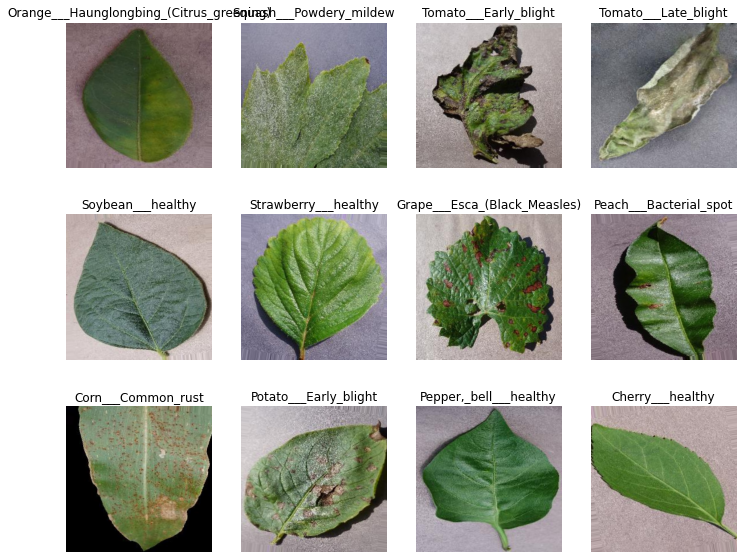

In [14]:
for image_batch, label_batch in test_generator:
    plt.figure(figsize=(12,10))
    for i in range(12):   
         plt.subplot(3,4,i+1)
         plt.imshow(image_batch[i])
         plt.title(class_names[int(label_batch[i])])
         plt.axis('off')
    break

In [9]:
def predict2(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = new_model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    #confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class

In [78]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)
    print(predictions)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

[[4.0570239e-14 4.7994670e-13 1.0336182e-11 1.5671016e-15 2.0285593e-16
  2.3086178e-14 2.2738688e-12 8.2536044e-16 3.7702551e-14 2.1706222e-16
  4.5642870e-15 4.4552801e-20 1.9280679e-15 1.9942014e-16 9.1291449e-13
  6.1230953e-20 2.8648627e-11 9.9999762e-01 4.4874740e-13 2.2591796e-06
  9.3870919e-15 1.1816591e-07 1.7283001e-10 8.3309650e-19 5.5103402e-19
  5.1913468e-15 2.0501645e-22 2.6696416e-12 2.0693139e-21 3.3346500e-12
  2.6201832e-09 1.1870596e-12 1.7274284e-12 3.7426741e-12 4.8014934e-12
  9.8548551e-17 2.3814172e-16 4.7375086e-18 2.8047051e-20]]


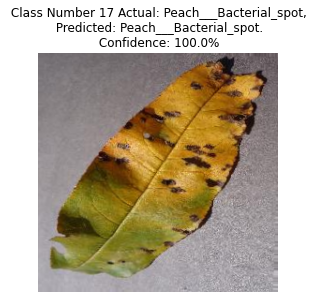

In [108]:
plt.figure(figsize=(30,30))
for images, labels in test_generator:
    for i in range(1):
        ax = plt.subplot(5, 6, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(new_model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f" Class Number {class_names.index(actual_class)} Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [16]:
predicted_labels=[]
actual_labels=[]
j=0
for images, labels in test_generator:
    j=j+1
    if j > 9:
        break
    for i in range(255):  
        

        predicted_labels.append(class_names.index(predict2(new_model, images[i])))
        actual_labels.append(int(labels[i])) 

In [56]:
cmatrix = confusion_matrix(actual_labels, predicted_labels)
print(cmatrix)

[[ 12   0   0 ...   0   0   0]
 [  0  27   0 ...   0   0   0]
 [  0   0   9 ...   0   0   0]
 ...
 [  0   0   0 ... 218   0   0]
 [  0   0   0 ...   0  18   0]
 [  0   0   0 ...   0   0  65]]


In [55]:
classmatrix = classification_report(actual_labels, predicted_labels)
print(classmatrix)

              precision    recall  f1-score   support

           0       1.00      0.75      0.86        16
           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00         9
           3       0.97      1.00      0.99        75
           4       1.00      1.00      1.00        53
           5       0.99      1.00      0.99        66
           6       1.00      1.00      1.00        48
           7       1.00      1.00      1.00        43
           8       0.87      0.72      0.79        18
           9       1.00      1.00      1.00        44
          10       0.89      0.95      0.92        44
          11       0.98      1.00      0.99        52
          12       1.00      0.96      0.98        48
          13       0.96      0.98      0.97        54
          14       1.00      1.00      1.00        43
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00       219
          17       1.00    

In [21]:
import pandas as pd
import seaborn as sns


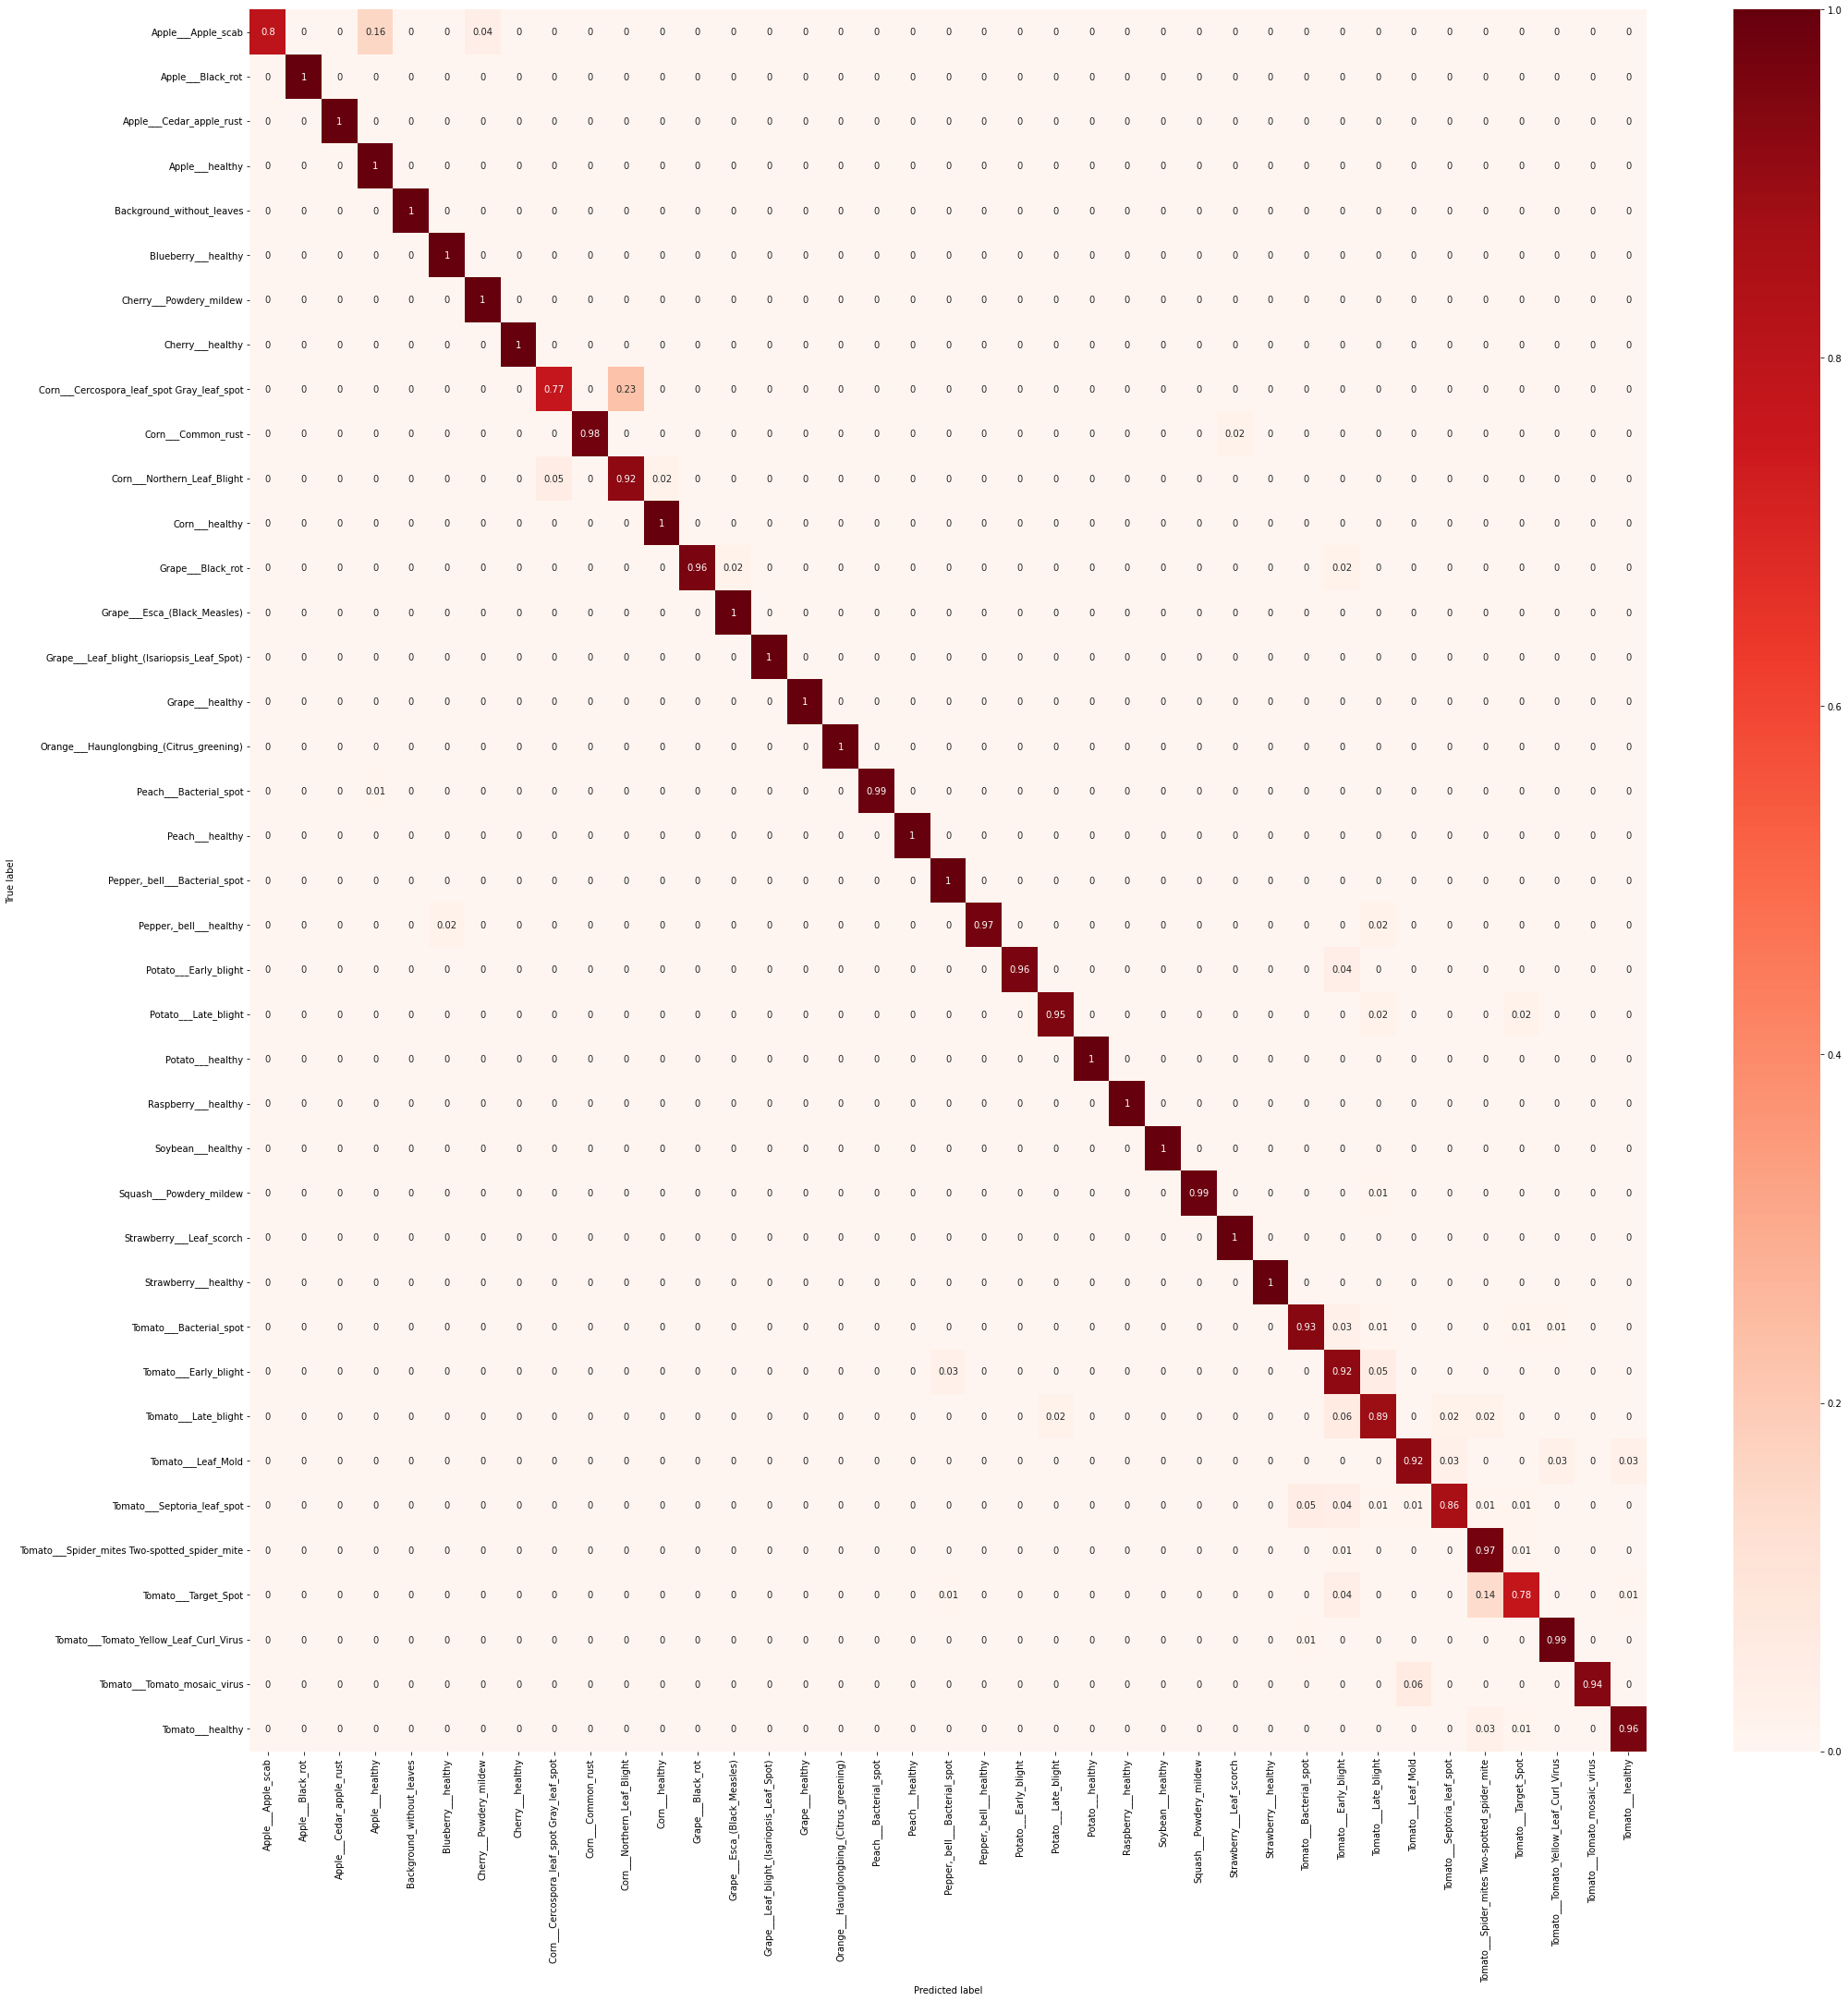

In [24]:
con_mat = tf.math.confusion_matrix(labels=actual_labels, predictions=predicted_labels).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = class_names, 
                     columns = class_names)

figure = plt.figure(figsize=(30, 30))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Reds)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [24]:
class_names[0]

'Apple___Apple_scab'

In [103]:
image= Image.open('/Users/fasihussaini/Desktop/PlantVillage/test/Grape___Esca_(Black_Measles)/image (236).JPG')

In [26]:
from PIL import Image


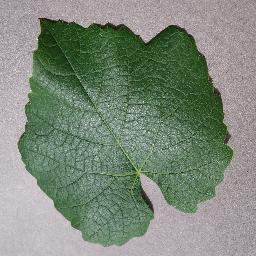

In [33]:
image

In [100]:
img_array = tf.keras.preprocessing.image.img_to_array(image)
img_array = tf.expand_dims(img_array, 0)

predictions = new_model.predict(img_array)
print(predictions)

predicted_class = class_names[np.argmax(predictions[0])]
confidence = round(100 * (np.max(predictions[0])), 2)

predicted_class

[[0.0000000e+00 4.8916763e-23 1.1779724e-23 0.0000000e+00 9.9999940e-01
  3.3314139e-27 3.2335493e-36 5.0104785e-34 0.0000000e+00 1.4770692e-30
  0.0000000e+00 1.4501875e-21 5.4548349e-07 1.4652024e-08 2.1381653e-15
  0.0000000e+00 0.0000000e+00 7.2528584e-29 0.0000000e+00 3.5099106e-25
  1.7248111e-34 5.8138152e-32 1.9456254e-31 0.0000000e+00 1.4770980e-29
  5.3285725e-38 0.0000000e+00 9.3186824e-14 0.0000000e+00 0.0000000e+00
  2.5570145e-26 1.3751960e-28 0.0000000e+00 1.1789485e-22 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 2.3548869e-33]]


'Background_without_leaves'

In [85]:
predictions

array([[1.4976654e-33, 1.9285278e-11, 4.9928827e-17, 5.6684962e-26,
        9.9999750e-01, 9.5134302e-14, 0.0000000e+00, 2.8631784e-27,
        1.3025152e-33, 3.6883733e-21, 1.8383188e-27, 4.0603503e-15,
        2.4699548e-06, 9.1979528e-21, 4.0424846e-15, 2.2588831e-22,
        1.2599436e-34, 2.3523566e-28, 0.0000000e+00, 3.9158282e-28,
        8.8078108e-20, 4.7381115e-30, 6.7691613e-31, 0.0000000e+00,
        1.1538733e-16, 7.0592184e-25, 2.3036686e-33, 1.3066921e-16,
        0.0000000e+00, 0.0000000e+00, 1.3473141e-21, 1.8246480e-25,
        0.0000000e+00, 1.6340614e-20, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 1.1400962e-22]], dtype=float32)

In [86]:
len(predicted_labels)

2295

In [77]:
i=0
for label in range(len(actual_labels)):
    
    if(predicted_labels[label]==actual_labels[label]):
        i=i+1
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
27

[[4.0570239e-14 4.7994670e-13 1.0336182e-11 1.5671016e-15 2.0285593e-16
  2.3086178e-14 2.2738688e-12 8.2536044e-16 3.7702551e-14 2.1706222e-16
  4.5642870e-15 4.4552801e-20 1.9280679e-15 1.9942014e-16 9.1291449e-13
  6.1230953e-20 2.8648627e-11 9.9999762e-01 4.4874740e-13 2.2591796e-06
  9.3870919e-15 1.1816591e-07 1.7283001e-10 8.3309650e-19 5.5103402e-19
  5.1913468e-15 2.0501645e-22 2.6696416e-12 2.0693139e-21 3.3346500e-12
  2.6201832e-09 1.1870596e-12 1.7274284e-12 3.7426741e-12 4.8014934e-12
  9.8548551e-17 2.3814172e-16 4.7375086e-18 2.8047051e-20]]


Text(0.5, 1.0, ' \n Predicted: Peach___Bacterial_spot.\n Confidence: 100.0%')

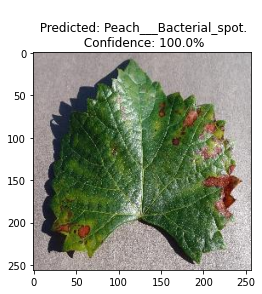

In [110]:

        plt.imshow(image)
        
        predicted_class, confidence = predict(new_model, image)
        
        
        plt.title(f" \n Predicted: {predicted_class}.\n Confidence: {confidence}%")
